In [1]:
import os 

In [2]:
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.models import Sequential

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import Sequential
from tensorflow.compat.v1.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D

import matplotlib.pyplot as plt

In [3]:
width=256
height=256
depth=3
epoch_ = 25
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
root_dir = r"E:\PlantVillage"

INIT_LR = 1e-3

In [4]:
import os

# Print the absolute path
root_dir = os.path.abspath(root_dir)
print(f"Absolute path: {root_dir}")

# Check if the directory exists
if os.path.exists(root_dir):
    print("The directory exists.")
else:
    print("The directory does not exist.")

# List the contents of the directory
print("Contents of the directory:")
print(os.listdir(root_dir))


Absolute path: E:\PlantVillage
The directory exists.
Contents of the directory:
['train', 'val']


In [5]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [6]:
image_list, label_list = [], []

In [7]:
from PIL import Image
import os
import numpy as np

root_dir = "E:/PlantVillage"

image_list = []
label_list = []

def sanitize_filename(filename):
    return ''.join(c if c.isalnum() or c in ['.', '_'] else '_' for c in filename)

try:
    for plant_folder in os.listdir(root_dir):
        if plant_folder == ".DS_Store":
            continue

        plant_folder_path = os.path.join(root_dir, plant_folder)

        for disease_folder in os.listdir(plant_folder_path):
            if disease_folder == ".DS_Store":
                continue

            print(f"[INFO] Processing {disease_folder} ...")
            disease_folder_path = os.path.join(plant_folder_path, disease_folder)

            for image_file in os.listdir(disease_folder_path):
                if image_file == ".DS_Store":
                    continue

                img_path = os.path.join(disease_folder_path, image_file)

                if img_path.lower().endswith((".jpg", ".jpeg")):
                    try:
                        with Image.open(img_path) as img:
                            # Perform operations on the image if needed
                            # Example: img = img.resize((new_width, new_height))

                            # Convert the image to a NumPy array
                            img_array = np.array(img)

                            # Append to the lists
                            image_list.append(img_array)
                            label_list.append(disease_folder)
                    except Exception as e:
                        print(f"Error processing image {img_path}: {e}")

except Exception as e:
    print(f"Error: {e}")


[INFO] Processing Apple___Apple_scab ...
[INFO] Processing Apple___Black_rot ...
[INFO] Processing Apple___Cedar_apple_rust ...
[INFO] Processing Apple___healthy ...
[INFO] Processing Blueberry___healthy ...
[INFO] Processing Cherry_(including_sour)___healthy ...
[INFO] Processing Cherry_(including_sour)___Powdery_mildew ...
[INFO] Processing Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot ...
[INFO] Processing Corn_(maize)___Common_rust_ ...
[INFO] Processing Corn_(maize)___healthy ...
[INFO] Processing Corn_(maize)___Northern_Leaf_Blight ...
[INFO] Processing Grape___Black_rot ...
[INFO] Processing Grape___Esca_(Black_Measles) ...
[INFO] Processing Grape___healthy ...
[INFO] Processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot) ...
[INFO] Processing Orange___Haunglongbing_(Citrus_greening) ...
[INFO] Processing Peach___Bacterial_spot ...
[INFO] Processing Peach___healthy ...
[INFO] Processing Pepper,_bell___Bacterial_spot ...
[INFO] Processing Pepper,_bell___healthy ...
[INFO] Pro

In [8]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)


In [9]:
print(label_binarizer.classes_)

['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tom

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Specify the path to your dataset
dataset_path = "E:\\PlantVillage"

# Create an ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Create data generators for training and testing
train_generator = datagen.flow_from_directory(
    dataset_path + '\\train',  # Assuming your training data is in a 'train' subdirectory
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'  # Adjust as per your task
)

# Specify the correct subdirectory for validation data
validation_generator = datagen.flow_from_directory(
    dataset_path + '\\val',  # Assuming your validation data is in a 'val' subdirectory
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'  # Adjust as per your task
)


Found 43444 images belonging to 38 classes.
Found 10861 images belonging to 38 classes.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Specify the path to your dataset
dataset_path = "E:\\PlantVillage"

# Create an ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Create data generators for training and testing
train_generator = datagen.flow_from_directory(
    dataset_path + '\\train',  # Assuming your training data is in a 'train' subdirectory
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'  # Adjust as per your task
)

# Specify the correct subdirectory for validation data
validation_generator = datagen.flow_from_directory(
    dataset_path + '\\val',  # Assuming your validation data is in a 'val' subdirectory
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'  # Adjust as per your task
)

# Get the number of classes from the generator
num_classes = len(train_generator.class_indices)

# Define your model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=[Accuracy()])

# Get the number of samples in the training set
num_train_samples = len(train_generator.filenames)

# Specify the batch size
batch_size = 32

# Specify the number of training steps per epoch
num_train_steps = num_train_samples // batch_size

# Specify the number of epochs
num_epochs = 10  # Adjust the number of epochs as needed

# Train the model using the generator
model.fit(train_generator, steps_per_epoch=num_train_steps, epochs=num_epochs, validation_data=validation_generator)


Found 43444 images belonging to 38 classes.
Found 10861 images belonging to 38 classes.
Epoch 1/10
1357/1357 [==============================] - 4152s 3s/step - loss: 0.9454 - accuracy: 3.6371e-06 - val_loss: 0.4197 - val_accuracy: 2.1807e-05
Epoch 2/10
1357/1357 [==============================] - 3864s 3s/step - loss: 0.3026 - accuracy: 4.6373e-04 - val_loss: 0.4622 - val_accuracy: 5.3547e-04
Epoch 3/10
1357/1357 [==============================] - 2794s 2s/step - loss: 0.1712 - accuracy: 0.0021 - val_loss: 0.4364 - val_accuracy: 7.4870e-04
Epoch 4/10
1357/1357 [==============================] - 2722s 2s/step - loss: 0.1046 - accuracy: 0.0048 - val_loss: 0.4849 - val_accuracy: 0.0072
Epoch 5/10
1357/1357 [==============================] - 4067s 3s/step - loss: 0.0786 - accuracy: 0.0105 - val_loss: 0.5135 - val_accuracy: 0.0166
Epoch 6/10
1357/1357 [==============================] - 2727s 2s/step - loss: 0.0712 - accuracy: 0.0136 - val_loss: 0.4492 - val_accuracy: 0.0107
Epoch 7/10
1357/

In [17]:
img = "E:/PlantVillage/val/Tomato___Leaf_Mold/6e5d3e12-17ad-4c87-bb29-26b13a797560___Crnl_L.Mold 9075.JPG"

In [18]:
im = convert_image_to_array(img)
np_image_li = np.array(im, dtype=np.float16) / 225.0
npp_image = np.expand_dims(np_image_li, axis=0)

In [19]:
result = model.predict(npp_image)
print(result)
itemindex = np.where(result == np.max(result))
print("Probability: " + str(np.max(result)) + "\n" + label_binarizer.classes_[itemindex[1][0]])

1/1 [==============================] - 0s 48ms/step
[[5.9698744e-27 3.0015102e-19 2.0495727e-25 9.9919957e-01 1.9203054e-17
  3.6826127e-17 3.2445514e-27 1.3034703e-15 1.1245262e-18 2.7457629e-24
  4.6266189e-15 9.8741595e-15 1.6642722e-12 1.0647089e-17 1.0176245e-24
  3.4195372e-20 4.2217640e-18 1.1887689e-12 1.5175081e-21 1.0942983e-18
  1.4478738e-27 2.2172744e-18 1.0452533e-21 2.8151389e-30 8.0045464e-04
  1.9501717e-19 5.7372509e-28 9.5562039e-31 1.6985051e-09 2.8221498e-11
  2.1330765e-14 8.2986833e-15 4.8052352e-12 1.5035607e-17 6.5339153e-16
  6.2026105e-12 1.3580826e-20 5.5249508e-23]]
Probability: 0.99919957
Apple___healthy


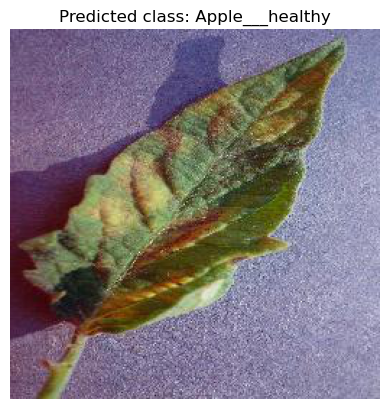

In [20]:
image = Image.open(img)
plt.imshow(image)
plt.axis('off')
plt.title("Predicted class: " + label_binarizer.classes_[itemindex[1][0]])
plt.show()